# FBB you should do more on the critical and inferential side.
# you should remove my instruction cells: this should be your notebook, with your description of the exercise as a header, and your code and description of the code, and plots, and explaining why you do what you do

# you MUST label, give titles, and decribe with captions your figure to show that you are understanding what you are doing, and to allow the reader to understand the notebook without having to read the code. The notebook is a "presentation". This requirement includes using large enough fonts and figures!
# look for more comments int he cells containing FBB¶


In [1]:
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
from scipy.optimize import curve_fit, minimize
import json
import os
from scipy.optimize import minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


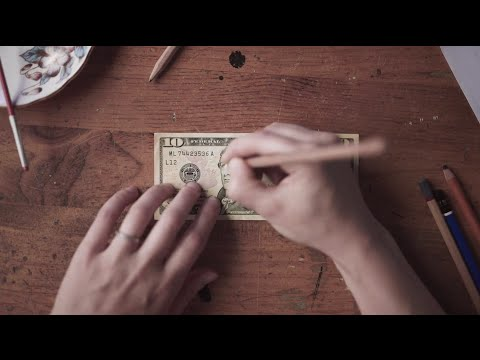

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

In [3]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [7]:
all_males = {'all':None, 'white':None, 'black':None, 'hispanic':None, 'asian':None }
all_females = {'all':None, 'white':None, 'black':None, 'hispanic':None, 'asian':None }

In [8]:
all_males["all"] = pd.read_excel( url + 'pinc08_2_1_1.xls',  header=9)
all_males["white"] = pd.read_excel( url + 'pinc08_2_1_4.xls',  header=9)
all_males["black"] = pd.read_excel( url + 'pinc08_2_1_6.xls',  header=9)
all_males["asian"] = pd.read_excel( url + 'pinc08_2_1_8.xls',  header=9)
all_males["hispanic"] = pd.read_excel( url + 'pinc08_2_1_9.xls',  header=9)

all_females["all"] = pd.read_excel( url + 'pinc08_3_1_1.xls',  header=9)
all_females["white"] = pd.read_excel( url + 'pinc08_3_1_4.xls',  header=9)
all_females["black"] = pd.read_excel( url + 'pinc08_3_1_6.xls',  header=9)
all_females["asian"] = pd.read_excel( url + 'pinc08_3_1_8.xls',  header=9)
all_females["hispanic"] = pd.read_excel( url + 'pinc08_3_1_9.xls',  header=9)

all_females['all'].head()

Characteristic  Total with Income  $1 to $2,499 or loss  \
0                        NaN                NaN                   NaN   
1                  ....Total           109956.0                7590.0   
2                   Earnings            74545.0                4198.0   
3         ..Wages and Salary            71220.0                3835.0   
4  ..Nonfarm Self-Employment             4694.0                1282.0   

   $2,500 to $4,999  $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
0               NaN               NaN               NaN                 NaN   
1            4298.0            5557.0            7874.0              8052.0   
2            3118.0            3269.0            2662.0              4579.0   
3            2954.0            3005.0            2411.0              4309.0   
4             288.0             410.0             253.0               388.0   

   $12,500 to $14,999  $15,000 to $17,499  $17,500 to $19,999  \
0                 NaN                 NaN                 NaN   
1              5720.0              6768.0              4377.0   
2              1994.0              4134.0              2585.0   
3              1941.0              3908.0              2484.0   
4                84.0               265.0               126.0   

        ...         $92,500 to $94,999  $95,000 to $97,499  \
0       ...                        NaN                 NaN   
1       ...                      167.0               285.0   
2       ...                       60.0               236.0   
3       ...                       61.0               233.0   
4       ...                        0.0                 0.0   

   $97,500 to $99,999  $100,000 and over  Median income  \
0                 NaN                NaN  Value\n(Dol.)   
1               184.0             4442.0          22063   
2               127.0             3535.0          27736   
3               126.0             3370.0          28402   
4                 0.0              127.0          10732   

              Unnamed: 44    Mean income             Unnamed: 46  Gini ratio  \
0  Standard\nerror (Dol.)  Value\n(Dol.)  Standard\nerror (Dol.)       Ratio   
1                     137          31968                     250       0.495   
2                     364          36189                     307       0.466   
3                     379          36412                     316       0.461   
4                     399          20942                    1123        0.65   

       Unnamed: 48  
0  Standard\nerror  
1           0.0025  
2           0.0032  
3           0.0032  
4           0.0162  

[5 rows x 49 columns]

In [9]:
all_females["all"].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [10]:
for gender in [all_males, all_females]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


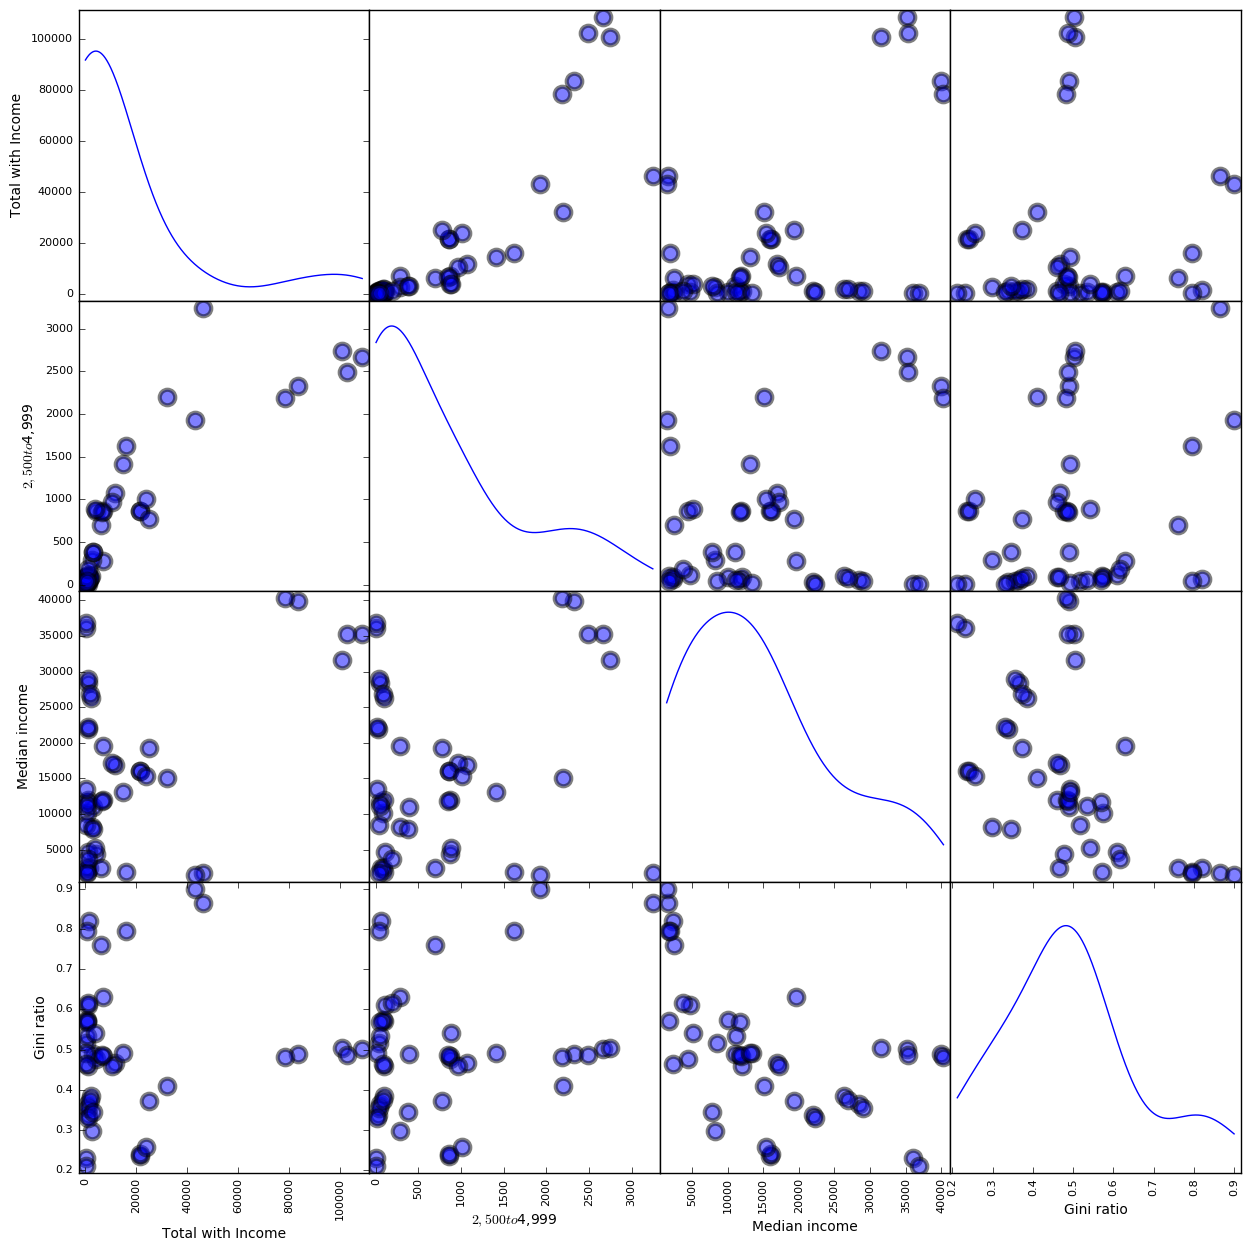

In [12]:
fig = pd.scatter_matrix(all_males['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

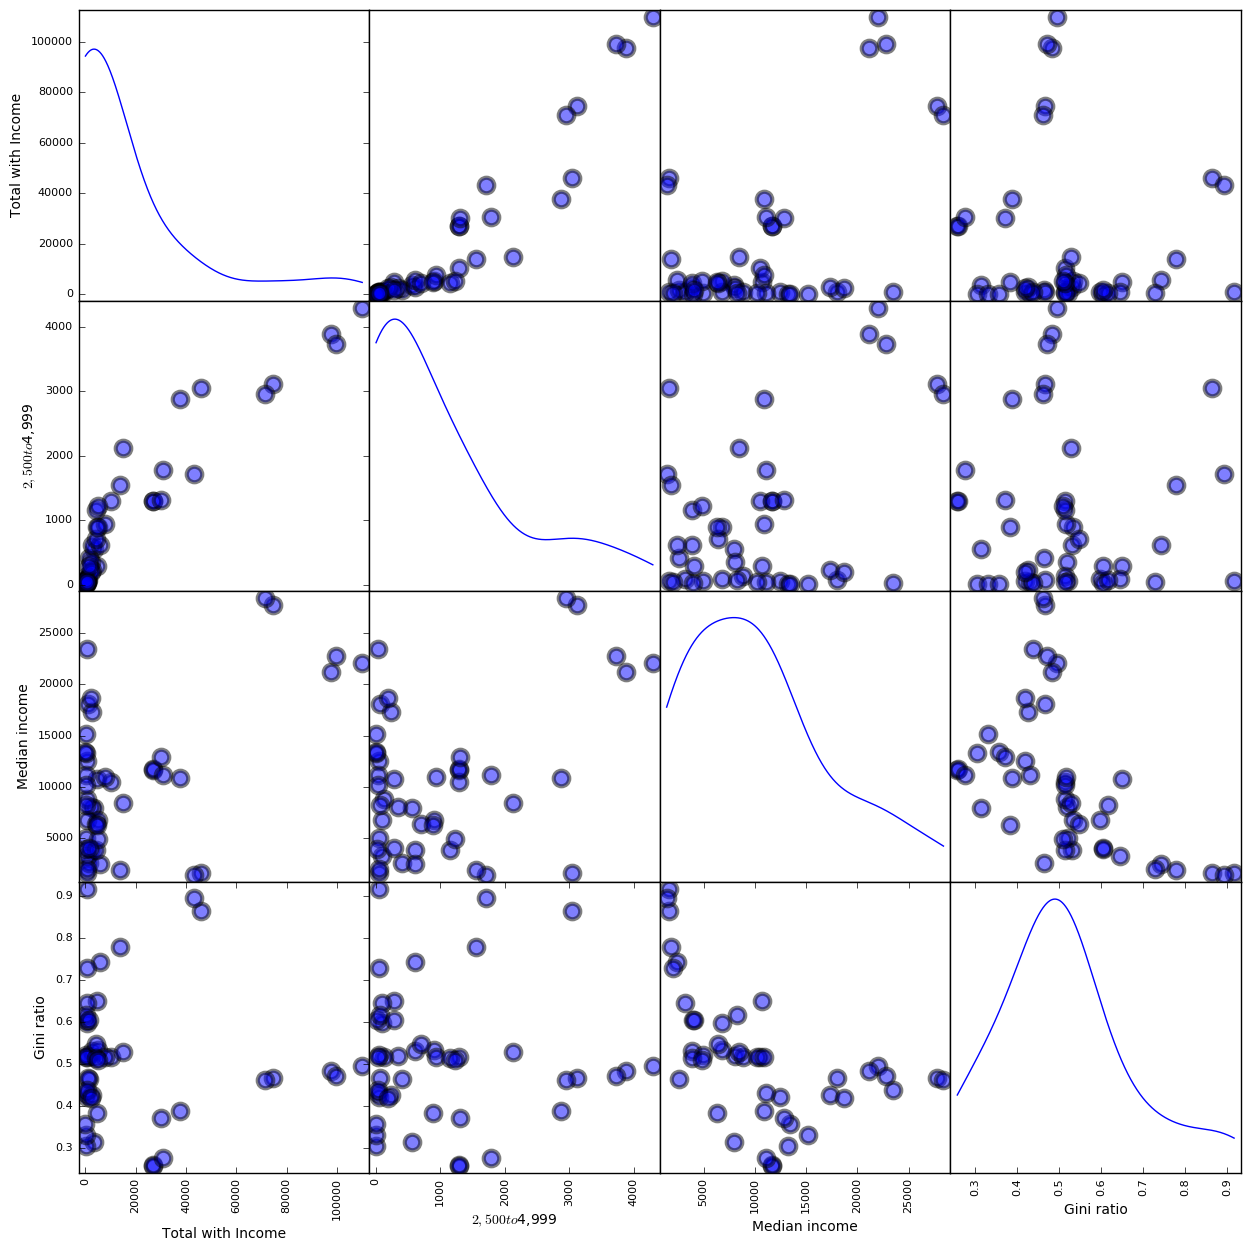

In [13]:
fig = pd.scatter_matrix(all_females['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

In [15]:
income = pd.DataFrame(columns=['males','females'], index=['hispanic','all','black','white','asian'])

for k in all_females:
    income["males"][k] = all_males[k]["Median income"][1]
    income["females"][k] = all_females[k]["Median income"][1]

males = np.array(list(income["males"]))
females = np.array(list(income["females"]))

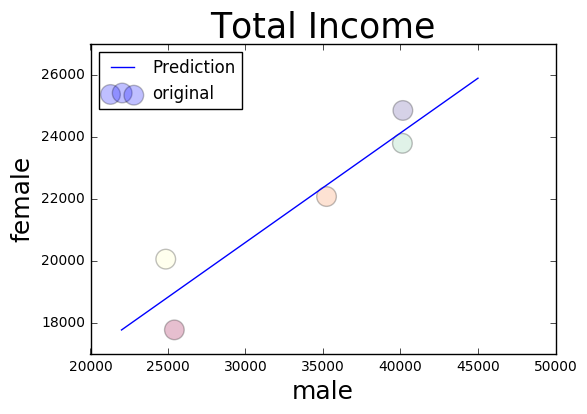

In [16]:
def linear(x, a, b):
    return a+b*x

params = np.polyfit(males, females, 1)

pl.scatter(males, females, c=range(1,6), s=200, alpha=0.25,  
           cmap = plt.get_cmap('Spectral'), label='original') 
x=np.arange(22000,45000)
pl.plot(x,linear(x,params[1],params[0]), label='Prediction')
pl.xlabel("male", fontsize=18)
pl.ylabel("female", fontsize=18)
pl.title("Total Income", fontsize=25)
pl.legend(loc='best')

# FBB missing figure caption. Also missing x=y line which I asked you to plot. The legend is incorrect: if you plot datapoints in color the legend or the captions need to describe what the colors mean. Prediction is an insufficient description as well (best fit line regression through the data and the origin or whatever)

In [17]:
from scipy import stats
allmales=np.array([0., all_males['all']['Median income'][1],
                    all_males['white']['Median income'][1],
                    all_males['black']['Median income'][1],
                     all_males['hispanic']['Median income'][1],
                    all_males['asian']['Median income'][1]])

allfemales=np.array([0.] + [all_females[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(allmales, allfemales)
beta1 = cor[0] * allfemales.std() / allmales.std()
beta0 = allfemales.mean() - beta1 * allmales.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

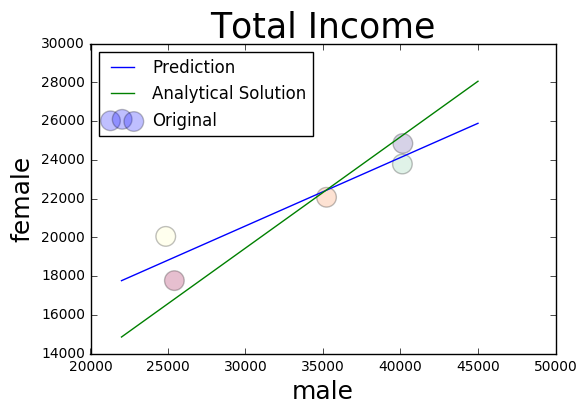

In [18]:
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.25,  
           cmap = plt.get_cmap('Spectral'), label='Original') 
x=np.arange(22000,45000)
pl.plot(x,linear(x,params[1],params[0]), label='Prediction')
pl.plot(x,linear(x,beta0,beta1), label='Analytical Solution')
pl.xlabel("male", fontsize=18)
pl.ylabel("female", fontsize=18)
pl.title("Total Income", fontsize=25)
pl.legend(loc='best')

# FBB missing caption

In [26]:
allmales_allincomes = np.array(
    np.concatenate([all_males['all']['Median income'][:].values,
                    all_males['white']['Median income'][:].values,
                    all_males['black']['Median income'][:].values,
                    all_males['hispanic']['Median income'][:].values,
                    all_males['asian']['Median income'][:].values]).flatten())
allfemales_allincomes = np.array(
    np.concatenate([all_females[k]['Median income'][:].values \
                    for k in ['all', 'white', 'black', 'hispanic', 'asian']]).flatten())
mask = ~(np.isnan(allmales_allincomes) + np.isnan(allfemales_allincomes))

In [27]:
params_all = np.polyfit(allmales_allincomes[mask],allfemales_allincomes[mask],1)
cor = stats.spearmanr(allmales_allincomes[mask], allfemales_allincomes[mask])
beta1_all = cor[0] * allfemales_allincomes[mask].std() / allmales_allincomes[mask].std()
beta0_all = allfemales_allincomes[mask].mean() - beta1 * allmales_allincomes[mask].mean()

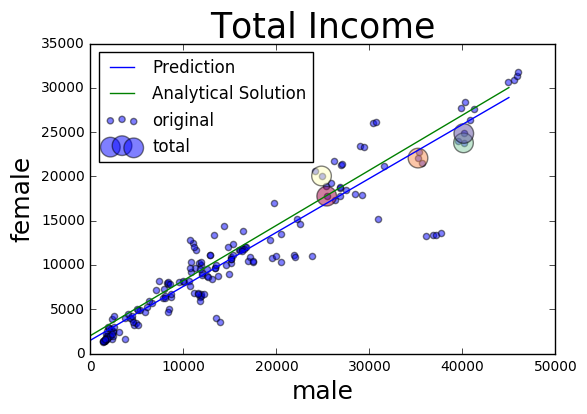

In [28]:
pl.scatter(allmales_allincomes[mask], allfemales_allincomes[mask], s=20, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label='original') 
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label="total") 
x=np.arange(0,45000)
pl.plot(x,linear(x,params_all[1],params_all[0]), label='Prediction')
pl.plot(x,linear(x,beta0_all,beta1_all), label='Analytical Solution')
pl.xlabel("male", fontsize=18)
pl.ylabel("female", fontsize=18)
pl.title("Total Income", fontsize=25)
pl.xlim(left=0)
pl.ylim(bottom=0)
pl.legend(loc='best')

# FBB missing caption. a figure without a description might as well not be plotted. The science is in the interpretation of the figure

# Prediction

In [29]:
income

males females
hispanic  25411   17762
all       35228   22063
black     24855   20044
white     40122   23780
asian     40153   24840

## As is shown in the table above, males' pay is in average higher than females' pay in all races. Black and hispanic race have the least difference between male and female, while white and asian race have the biggest distance between man and women's pay. It is feasible to build model to test this idea.

# FBB "in average" should be "on average", but also this is the median, not the average. "It is feasible to build model to test this idea." this statement is of no effect: what model, how? it is not even clear what idea.

In [30]:
male_pay = 100000
female_pay = linear(male_pay, params_all[1], params_all[0]) 
print "female pay by fit function: {}".format(female_pay)
fe_pay = linear(male_pay,beta0_all, beta1_all)
print "female pay by analytical solution: {}".format(fe_pay)

female pay by fit function: 62395.0918029
female pay by analytical solution: 64252.0555874


As is shown above, woman pay by fit function is a bit lower than the analytical solution.

# FBB good point, but why?

# FBB ethnicity is covariant with income, which may invalidate the analysis (see my solution)
